# **DATA CLEANING**

***Data cleaning*** is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

**GIGO**: if data are incorrect, outcomes and algorithms are often unreliable. There is no one absolute way to establish the exact steps in the data cleaning process, it depends on the context.

Tasks:
1. Normalization/Standardization
2. Error Detection and Correction (*e.g.,* inconsistencies, missing data, outliers)
3. Duplicate Detection (and Data Fusion)

# **5. MISSING VALUES IMPUTATION**

***Data Imputation*** is the process of replacing missing data with substituted values. Missing values can introduce bias, can make some analyses difficult to be performed (even some algorithms do not support them) and decrease efficiency.

Data Imputation Methods:

*   SINGLE IMPUTATION
*   ML-BASED IMPUTATION
*   MULTIPLE IMPUTATION

Import libraries:

In [56]:
!git clone https://github.com/camillasancricca/DATADIQ.git

fatal: destination path 'DATADIQ' already exists and is not an empty directory.


In [57]:
import pandas as pd
import numpy as np
import missingno as mno

from sklearn import linear_model
from sklearn import ensemble
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor

from DATADIQ import scripts_for_E5 as s

Import data:

In [58]:
BEERS = pd.read_csv("https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/BEERS.csv")
BEERS

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,66.000,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,71.000,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,75.000,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2414,67.000,45.0,928,Belgorado,Belgian IPA,424,12.0
2415,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2416,55.000,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2417,55.000,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


**1. SINGLE IMPUTATION**

  - Replace with *standard values*
  - *Propagate* the last/next valid observation
  - *Replace* with the mean, median, standard deviation, most frequent value

In [59]:
BEERS.isnull().sum()

,0
abv,62
ibu,1007
id,0
name,0
style,5
brewery_id,0
ounces,0


In [60]:
BEERS.fillna(0)

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,0.0,1436,Pub Beer,American Pale Lager,408,12.0
1,66.000,0.0,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,71.000,0.0,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,0.0,2263,Sinister,American Double / Imperial IPA,177,12.0
4,75.000,0.0,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2414,67.000,45.0,928,Belgorado,Belgian IPA,424,12.0
2415,0.052,0.0,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2416,55.000,0.0,620,B3K Black Lager,Schwarzbier,424,12.0
2417,55.000,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [61]:
BEERS.fillna("missing")

,abv,ibu,id,name,style,brewery_id,ounces
0,0.05,missing,1436,Pub Beer,American Pale Lager,408,12.0
1,66.0,missing,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,71.0,missing,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.09,missing,2263,Sinister,American Double / Imperial IPA,177,12.0
4,75.0,missing,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2414,67.0,45.0,928,Belgorado,Belgian IPA,424,12.0
2415,0.052,missing,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2416,55.0,missing,620,B3K Black Lager,Schwarzbier,424,12.0
2417,55.0,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [62]:
BEERS.fillna(method="ffill") #or BEERS.ffill()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,66.000,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,71.000,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,75.000,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2414,67.000,45.0,928,Belgorado,Belgian IPA,424,12.0
2415,0.052,45.0,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2416,55.000,45.0,620,B3K Black Lager,Schwarzbier,424,12.0
2417,55.000,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [63]:
BEERS.fillna(method="bfill") #or BEERS.bfill()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,60.0,1436,Pub Beer,American Pale Lager,408,12.0
1,66.000,60.0,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,71.000,60.0,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,60.0,2263,Sinister,American Double / Imperial IPA,177,12.0
4,75.000,60.0,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2414,67.000,45.0,928,Belgorado,Belgian IPA,424,12.0
2415,0.052,40.0,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2416,55.000,40.0,620,B3K Black Lager,Schwarzbier,424,12.0
2417,55.000,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [64]:
BEERS["ibu"].fillna(BEERS["ibu"].mean())

,ibu
0,42.720255
1,42.720255
2,42.720255
3,42.720255
4,42.720255
...,...
2414,45.000000
2415,42.720255
2416,42.720255
2417,40.000000


In [65]:
BEERS["ibu"].fillna(BEERS["ibu"].median())

,ibu
0,35.0
1,35.0
2,35.0
3,35.0
4,35.0
...,...
2414,45.0
2415,35.0
2416,35.0
2417,40.0


In [66]:
BEERS["ibu"].fillna(BEERS["ibu"].std())

,ibu
0,25.907272
1,25.907272
2,25.907272
3,25.907272
4,25.907272
...,...
2414,45.000000
2415,25.907272
2416,25.907272
2417,40.000000


In [67]:
BEERS["ibu"].mode()

,ibu
0,20.0


In [68]:
BEERS["ibu"].fillna(BEERS["ibu"].mode()[0])

,ibu
0,20.0
1,20.0
2,20.0
3,20.0
4,20.0
...,...
2414,45.0
2415,20.0
2416,20.0
2417,40.0


In [69]:
DIAB = pd.read_csv("https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/DIABETES.csv")
DIAB

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [70]:
COLS = list(DIAB.columns)
COLS.remove("Outcome")

In [71]:
COLS

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [72]:
DIAB[COLS] = DIAB[COLS].replace(0,np.NaN)
DIAB

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


*missingno* library: visualize missing cells

<Axes: >

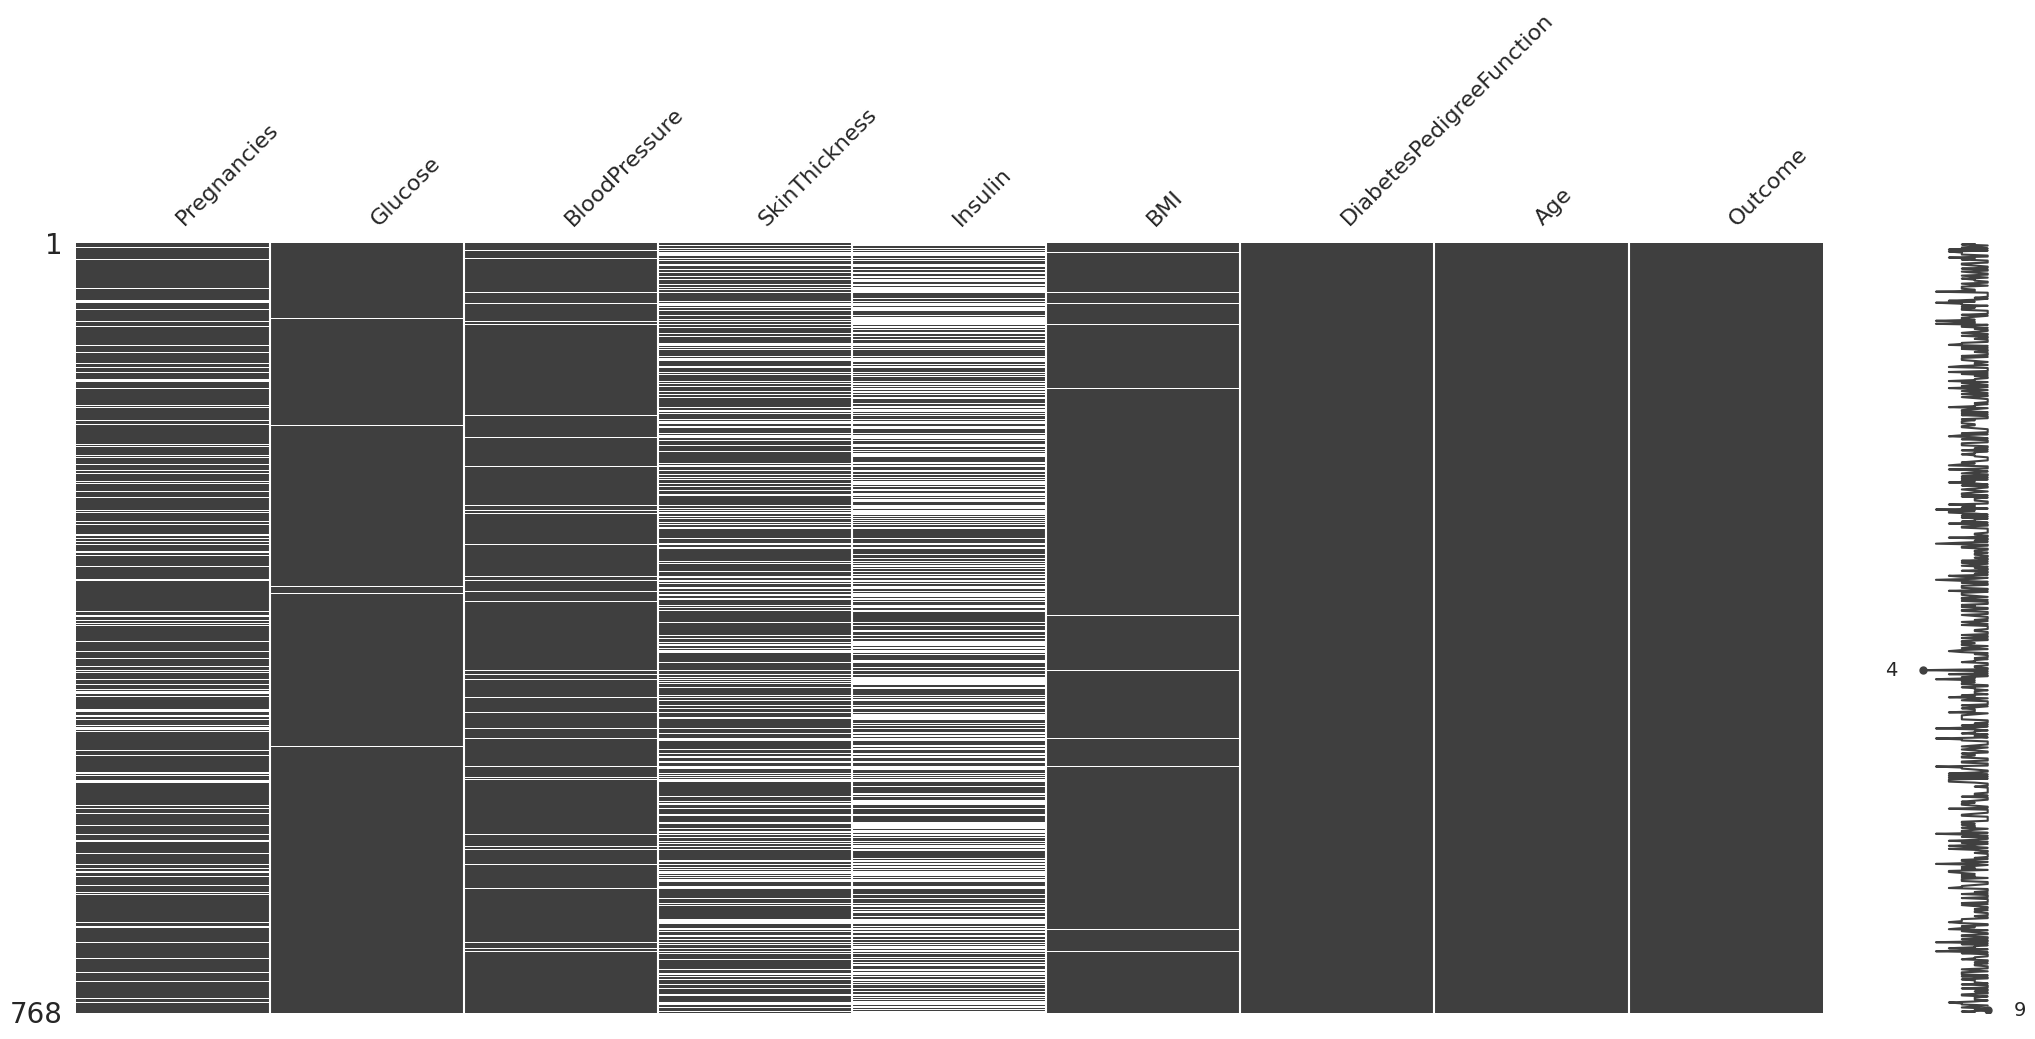

In [73]:
mno.matrix(DIAB)

*sklearn* library: SimpleImputer

In [74]:
SI = SimpleImputer(missing_values=np.NaN, strategy='mean')
DIAB_I = SI.fit_transform(DIAB)
DIAB_I = pd.DataFrame(DIAB_I, columns=DIAB.columns)
DIAB_I

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0.0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0.0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0.0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1.0


In [75]:
SI = SimpleImputer(missing_values=np.NaN, strategy='median')
DIAB_I = SI.fit_transform(DIAB)
DIAB_I = pd.DataFrame(DIAB_I, columns=DIAB.columns)
DIAB_I

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1.0


In [76]:
SI = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
DIAB_I = SI.fit_transform(DIAB)
DIAB_I = pd.DataFrame(DIAB_I, columns=DIAB.columns)
DIAB_I

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,105.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,105.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.0,105.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,1.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,105.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,32.0,105.0,30.1,0.349,47.0,1.0


**2. ML-BASED IMPUTATION**

*Algorithms*:
  - k-Nearest Neighbors (KNNImputer)
  - Linear/Logistic Regression
  - Other algorithms (e.g., Random Forest)

In [77]:
DIAB.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [78]:
missing_columns = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

IMP_DATA = pd.DataFrame(columns=["IMP" + name for name in missing_columns])
IMP_DATA

,IMPPregnancies,IMPGlucose,IMPBloodPressure,IMPSkinThickness,IMPInsulin,IMPBMI


KNNImputer (*sklearn* library)

  - Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [79]:
df = DIAB.copy()

IMPUTER = KNNImputer(n_neighbors=5)

df_knn = pd.DataFrame(IMPUTER.fit_transform(df))
df_knn.columns = df.columns
for col in missing_columns:
    IMP_DATA["IMP" + col] = df_knn[col]
IMP_DATA

,IMPPregnancies,IMPGlucose,IMPBloodPressure,IMPSkinThickness,IMPInsulin,IMPBMI
0,6.0,148.0,72.0,35.0,169.0,33.6
1,1.0,85.0,66.0,29.0,58.6,26.6
2,8.0,183.0,64.0,25.8,164.6,23.3
3,1.0,89.0,66.0,23.0,94.0,28.1
4,6.2,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9
764,2.0,122.0,70.0,27.0,165.0,36.8
765,5.0,121.0,72.0,23.0,112.0,26.2
766,1.0,126.0,60.0,35.2,134.2,30.1


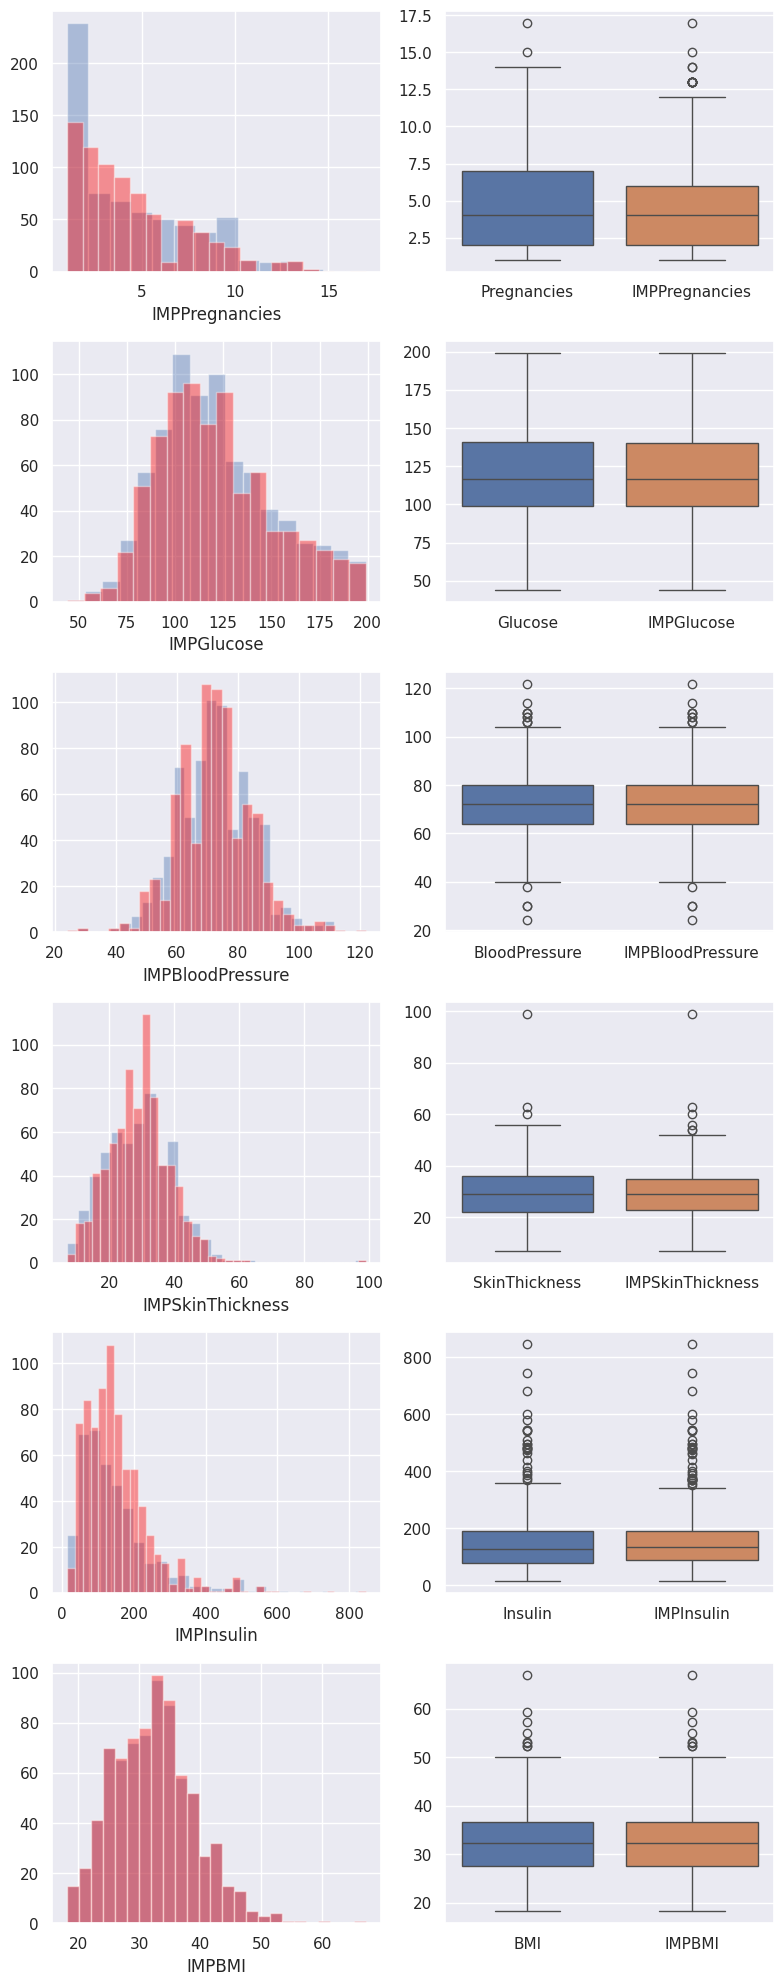

In [80]:
s.plot_imp(DIAB, IMP_DATA, missing_columns)

Linear Regression (*sklearn* library)

  - Linear Regression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares (RSS) between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [81]:
IMP_DATA = pd.DataFrame(columns = ["IMP" + name for name in missing_columns])
IMP_DATA

,IMPPregnancies,IMPGlucose,IMPBloodPressure,IMPSkinThickness,IMPInsulin,IMPBMI


In [82]:
for feature in missing_columns:

    DIAB[feature + '_imp'] = DIAB[feature]

    DIAB.loc[DIAB[feature].isnull(), feature + '_imp'] = DIAB[feature].median()

DIAB

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_imp,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1,6.0,148.0,72.0,35.0,125.0,33.6
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0,1.0,85.0,66.0,29.0,125.0,26.6
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1,8.0,183.0,64.0,29.0,125.0,23.3
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1.0,89.0,66.0,23.0,94.0,28.1
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1,4.0,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0,10.0,101.0,76.0,48.0,180.0,32.9
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0,2.0,122.0,70.0,27.0,125.0,36.8
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0,5.0,121.0,72.0,23.0,112.0,26.2
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1,1.0,126.0,60.0,29.0,125.0,30.1


In [83]:
DIAB[parameters].loc[DIAB[feature].notnull()]

,Glucose_imp,Outcome,SkinThickness_imp,BloodPressure_imp,DiabetesPedigreeFunction,Pregnancies_imp,Age,Insulin_imp
0,148.0,1,35.0,72.0,0.627,6.0,50,125.0
1,85.0,0,29.0,66.0,0.351,1.0,31,125.0
2,183.0,1,29.0,64.0,0.672,8.0,32,125.0
3,89.0,0,23.0,66.0,0.167,1.0,21,94.0
4,137.0,1,35.0,40.0,2.288,4.0,33,168.0
...,...,...,...,...,...,...,...,...
763,101.0,0,48.0,76.0,0.171,10.0,63,180.0
764,122.0,0,27.0,70.0,0.340,2.0,27,125.0
765,121.0,0,23.0,72.0,0.245,5.0,30,112.0
766,126.0,1,29.0,60.0,0.349,1.0,47,125.0


In [84]:
for feature in missing_columns:

    IMP_DATA["IMP" + feature] = DIAB[feature]
    parameters = list(set(DIAB.columns) - set(missing_columns) - {feature + '_imp'})

    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = DIAB[parameters].loc[DIAB[feature].notnull()], y = DIAB[feature + '_imp'].loc[DIAB[feature].notnull()])
    model_predicted = model.predict(DIAB[parameters].loc[DIAB[feature].isnull()])

    #observe that I preserve the index of the missing data from the original dataframe
    print("IMP" + feature + " successfully imputed")
    IMP_DATA.loc[DIAB[feature].isnull(), "IMP" + feature] = model_predicted
IMP_DATA

IMPPregnancies successfully imputed
IMPGlucose successfully imputed
IMPBloodPressure successfully imputed
IMPSkinThickness successfully imputed
IMPInsulin successfully imputed
IMPBMI successfully imputed


,IMPPregnancies,IMPGlucose,IMPBloodPressure,IMPSkinThickness,IMPInsulin,IMPBMI
0,6.000000,148.0,72.0,35.000000,221.801835,33.6
1,1.000000,85.0,66.0,29.000000,72.603017,26.6
2,8.000000,183.0,64.0,21.293542,251.459638,23.3
3,1.000000,89.0,66.0,23.000000,94.000000,28.1
4,3.755971,137.0,40.0,35.000000,168.000000,43.1
...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9
764,2.000000,122.0,70.0,27.000000,165.748151,36.8
765,5.000000,121.0,72.0,23.000000,112.000000,26.2
766,1.000000,126.0,60.0,28.469744,184.589096,30.1


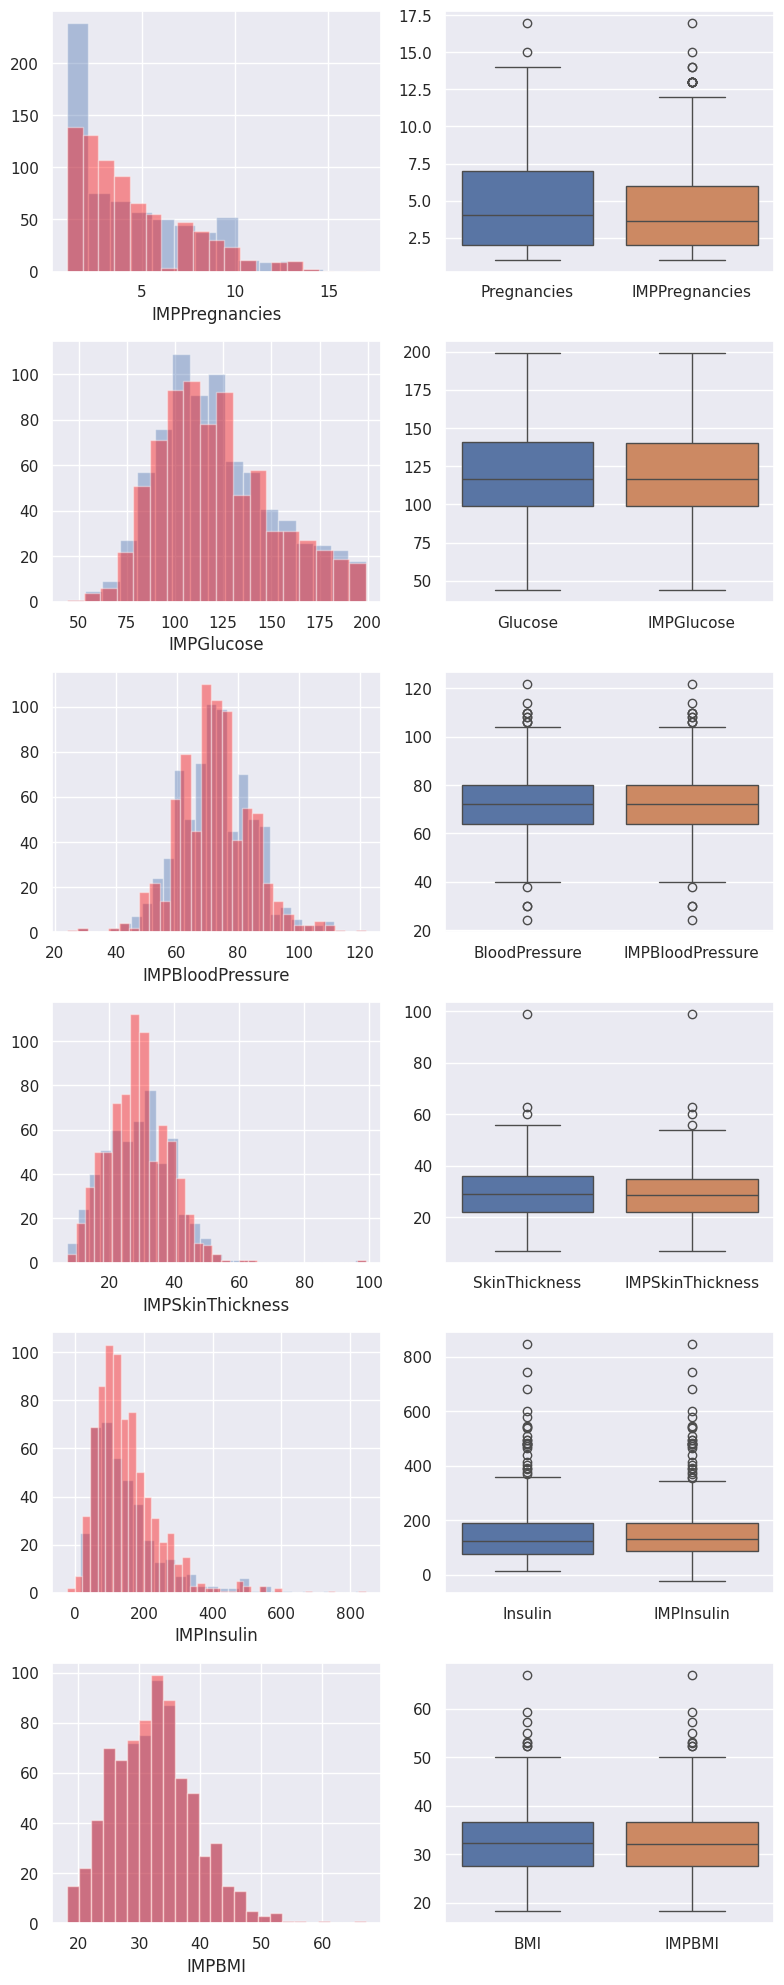

In [85]:
s.plot_imp(DIAB,IMP_DATA,missing_columns)

Other Algorithms (always of *sklearn*) with the same procedure!

(Linear/Logistic Regression for numerical/categorical variables  or Random Forest)

In [86]:
DIAB = pd.read_csv("https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/DIABETES.csv")

In [87]:
DIAB[COLS] = DIAB[COLS].replace(0,np.NaN)
DIAB.loc[DIAB['Pregnancies'] > 1, 'Pregnancies'] = 'More'
DIAB.loc[DIAB['Pregnancies'] == 1, 'Pregnancies'] = 'One'

In [88]:
DIAB

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,More,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,One,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,More,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,One,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,More,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,More,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,More,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,One,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [89]:
missing_columns = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

IMP_DATA = pd.DataFrame(columns = ["IMP" + name for name in missing_columns])
IMP_DATA

,IMPPregnancies,IMPGlucose,IMPBloodPressure,IMPSkinThickness,IMPInsulin,IMPBMI


In [90]:
CAT = list(DIAB.select_dtypes(include=['bool','object']).columns)
NUM = list(DIAB.select_dtypes(include=['int64','float64']).columns)

for feature in missing_columns:

    DIAB[feature + '_imp'] = DIAB[feature]

    if feature in NUM:
      DIAB.loc[DIAB[feature].isnull(), feature + '_imp'] = DIAB[feature].median()
    elif feature in CAT:
      DIAB.loc[DIAB[feature].isnull(), feature + '_imp'] = DIAB[feature].mode()[0]

DIAB

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_imp,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
0,More,148.0,72.0,35.0,NaN,33.6,0.627,50,1,More,148.0,72.0,35.0,125.0,33.6
1,One,85.0,66.0,29.0,NaN,26.6,0.351,31,0,One,85.0,66.0,29.0,125.0,26.6
2,More,183.0,64.0,NaN,NaN,23.3,0.672,32,1,More,183.0,64.0,29.0,125.0,23.3
3,One,89.0,66.0,23.0,94.0,28.1,0.167,21,0,One,89.0,66.0,23.0,94.0,28.1
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1,More,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,More,101.0,76.0,48.0,180.0,32.9,0.171,63,0,More,101.0,76.0,48.0,180.0,32.9
764,More,122.0,70.0,27.0,NaN,36.8,0.340,27,0,More,122.0,70.0,27.0,125.0,36.8
765,More,121.0,72.0,23.0,112.0,26.2,0.245,30,0,More,121.0,72.0,23.0,112.0,26.2
766,One,126.0,60.0,NaN,NaN,30.1,0.349,47,1,One,126.0,60.0,29.0,125.0,30.1


In [91]:
for feature in missing_columns:

    IMP_DATA["IMP" + feature] = DIAB[feature]
    parameters = list(set(DIAB.columns) - set(missing_columns) - {feature + '_imp'})

    #Create a Linear Regression model to estimate the missing data
    if feature in NUM:
      model = linear_model.LinearRegression()
    if feature in CAT:
      model = linear_model.LogisticRegression()

    X = s.encoding_categorical_variables(DIAB[parameters])

    model.fit(X = X.loc[DIAB[feature].notnull()], y = DIAB[feature + '_imp'].loc[DIAB[feature].notnull()])
    model_predicted = model.predict(X.loc[DIAB[feature].isnull()])

    #observe that I preserve the index of the missing data from the original dataframe
    print("IMP" + feature + " successfully imputed")
    IMP_DATA.loc[DIAB[feature].isnull(), "IMP" + feature] = model_predicted
IMP_DATA

IMPPregnancies successfully imputed
IMPGlucose successfully imputed
IMPBloodPressure successfully imputed
IMPSkinThickness successfully imputed
IMPInsulin successfully imputed
IMPBMI successfully imputed


,IMPPregnancies,IMPGlucose,IMPBloodPressure,IMPSkinThickness,IMPInsulin,IMPBMI
0,More,148.0,72.0,35.000000,216.363366,33.6
1,One,85.0,66.0,29.000000,67.453413,26.6
2,More,183.0,64.0,21.107602,264.051256,23.3
3,One,89.0,66.0,23.000000,94.000000,28.1
4,More,137.0,40.0,35.000000,168.000000,43.1
...,...,...,...,...,...,...
763,More,101.0,76.0,48.000000,180.000000,32.9
764,More,122.0,70.0,27.000000,160.055289,36.8
765,More,121.0,72.0,23.000000,112.000000,26.2
766,One,126.0,60.0,29.162443,170.159511,30.1


same procedure with Random Forest Classifier/Regressor:

In [95]:
DIAB = pd.read_csv("https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/DIABETES.csv")
DIAB[COLS] = DIAB[COLS].replace(0,np.NaN)
DIAB.loc[DIAB['Pregnancies'] > 1, 'Pregnancies'] = 'More'
DIAB.loc[DIAB['Pregnancies'] == 1, 'Pregnancies'] = 'One'

missing_columns = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

IMP_DATA = pd.DataFrame(columns = ["IMP" + name for name in missing_columns])

CAT = list(DIAB.select_dtypes(include=['bool','object']).columns)
NUM = list(DIAB.select_dtypes(include=['int64','float64']).columns)

for feature in missing_columns:

    DIAB[feature + '_imp'] = DIAB[feature]

    if feature in NUM:
      DIAB.loc[DIAB[feature].isnull(), feature + '_imp'] = DIAB[feature].median()
    elif feature in CAT:
      DIAB.loc[DIAB[feature].isnull(), feature + '_imp'] = DIAB[feature].mode()[0]

for feature in missing_columns:

    IMP_DATA["IMP" + feature] = DIAB[feature]
    parameters = list(set(DIAB.columns) - set(missing_columns) - {feature + '_imp'})

    #Create a Linear Regression model to estimate the missing data
    if feature in NUM:
      model = ensemble.RandomForestRegressor()
    if feature in CAT:
      model = ensemble.RandomForestClassifier()

    X = s.encoding_categorical_variables(DIAB[parameters])

    model.fit(X = X.loc[DIAB[feature].notnull()], y = DIAB[feature + '_imp'].loc[DIAB[feature].notnull()])
    model_predicted = model.predict(X.loc[DIAB[feature].isnull()])

    #observe that I preserve the index of the missing data from the original dataframe
    print("IMP" + feature + " successfully imputed")
    IMP_DATA.loc[DIAB[feature].isnull(), "IMP" + feature] = model_predicted

IMP_DATA

IMPPregnancies successfully imputed
IMPGlucose successfully imputed
IMPBloodPressure successfully imputed
IMPSkinThickness successfully imputed
IMPInsulin successfully imputed
IMPBMI successfully imputed


,IMPPregnancies,IMPGlucose,IMPBloodPressure,IMPSkinThickness,IMPInsulin,IMPBMI
0,More,148.0,72.0,35.00,178.19,33.6
1,One,85.0,66.0,29.00,50.83,26.6
2,More,183.0,64.0,18.50,222.32,23.3
3,One,89.0,66.0,23.00,94.00,28.1
4,More,137.0,40.0,35.00,168.00,43.1
...,...,...,...,...,...,...
763,More,101.0,76.0,48.00,180.00,32.9
764,More,122.0,70.0,27.00,177.02,36.8
765,More,121.0,72.0,23.00,112.00,26.2
766,One,126.0,60.0,27.42,144.26,30.1


**3. MICE (Multiple Imputation by Chained Equations)**

*sklearn* library: IterativeImputer

  - The *MICE* procedure imputes missing data through an iterative series of predictive models. In each iteration, each specified variable in the dataset is imputed using the other variables in the dataset. These iterations should be run until it appears that convergence has been met.

In [93]:
DIAB = pd.read_csv("https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/DIABETES.csv")
DIAB[COLS] = DIAB[COLS].replace(0,np.NaN)
missing_columns = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

IMP_DATA = pd.DataFrame(columns = ["IMP" + name for name in missing_columns])

df = DIAB.copy()
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), df.columns)
]
)
df_mice = multivariate_impute_pipe.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns=df.columns)
for col in df_mice[df.columns]:
    if col in missing_columns:
        IMP_DATA["IMP" + col] = df_mice[col]
IMP_DATA

,IMPPregnancies,IMPGlucose,IMPBloodPressure,IMPSkinThickness,IMPInsulin,IMPBMI
0,6.0,148.0,72.0,35.0,203.1,33.6
1,1.0,85.0,66.0,29.0,67.3,26.6
2,8.0,183.0,64.0,37.2,251.6,23.3
3,1.0,89.0,66.0,23.0,94.0,28.1
4,4.1,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9
764,2.0,122.0,70.0,27.0,156.7,36.8
765,5.0,121.0,72.0,23.0,112.0,26.2
766,1.0,126.0,60.0,32.3,166.9,30.1


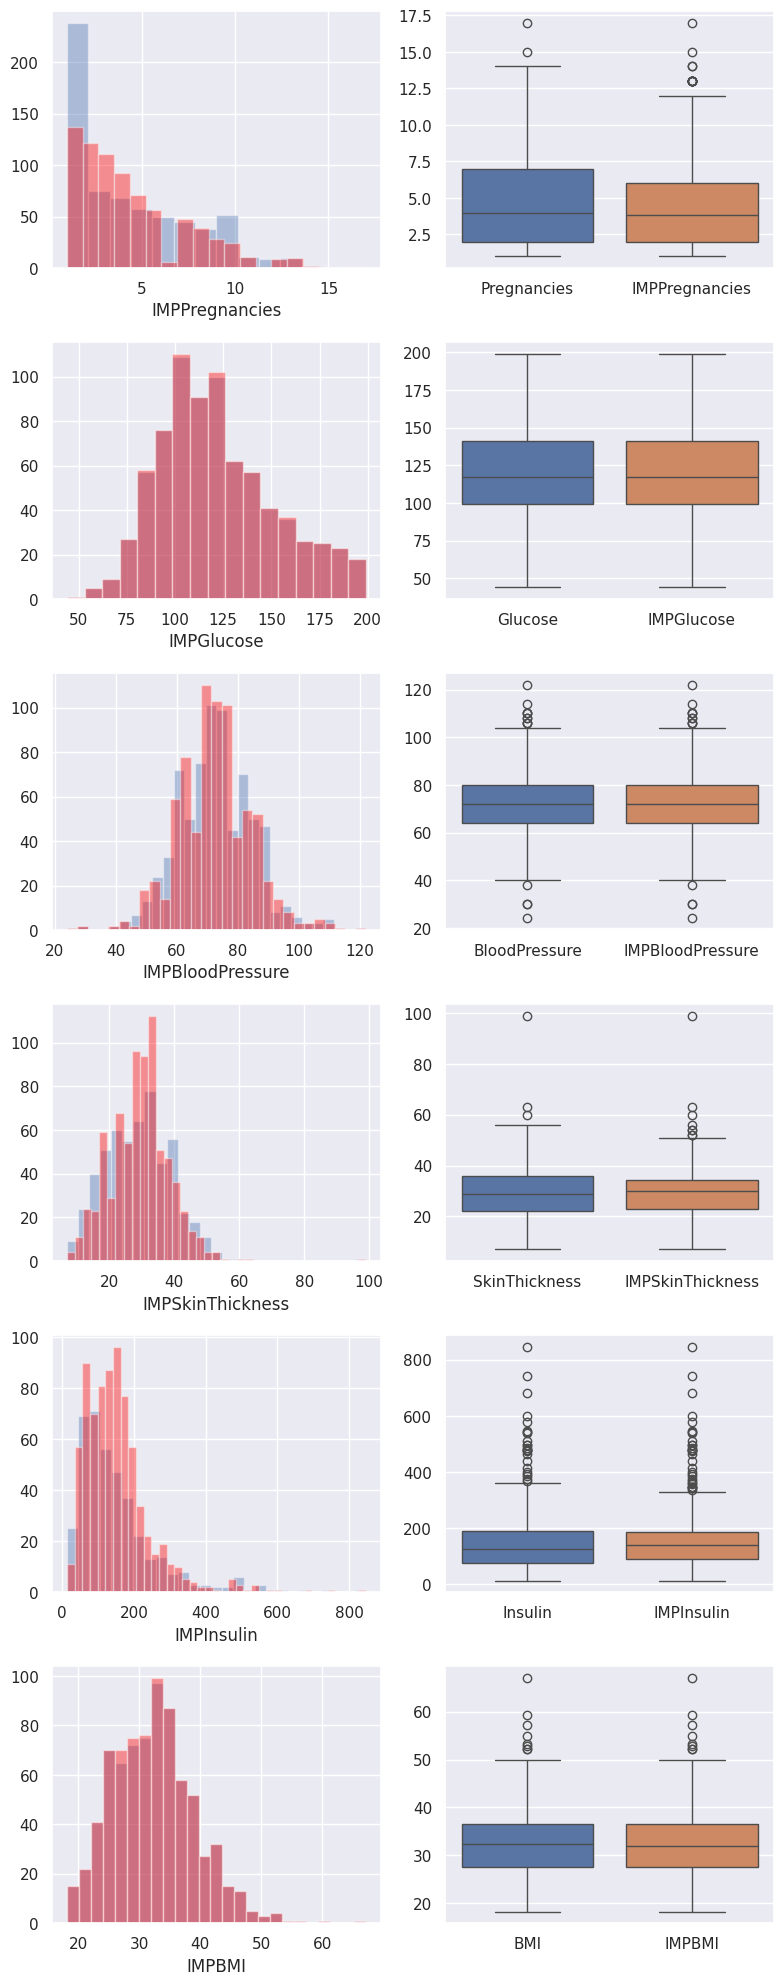

In [94]:
s.plot_imp(DIAB,IMP_DATA,missing_columns)

**Summary**

*Data Imputation:*
- DataFrame.isnull().sum()
- DataFrame.fillna()
- DataFrame.replace()

*Visualization of Missing Values:*
- mno.matrix()

*Data Imputation Algorithms (sklearn):*
- SimpleImputer()
- KNNImputer()
- IterativeImputer()